# I. Data Preprocessing

## Part 1: Load the data from the CSV into a DataFrame. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dog_rates_tweets.csv')
# Adapted from https://www.jianshu.com/p/f80586446151?ivk_sa=1024320u.

In [3]:
data

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


## Part 2: Find tweets that contain an “n/10” rating. Extract the numeric rating. Exclude tweets that don't contain a rating.

In [4]:
import re

In [5]:
matching = data.text.str.extract(r'(\d+(\.\d+)?)/10', expand = True)
# Adapted from https://chrisalbon.com/python/data_wrangling/pandas_regex_to_create_columns/

In [6]:
matching

,0,1
0,NaN,NaN
1,NaN,NaN
2,14,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
8510,NaN,NaN
8511,NaN,NaN
8512,NaN,NaN
8513,NaN,NaN


In [7]:
rating = matching[matching[0].notnull()][0]

In [8]:
rating = pd.to_numeric(rating)

In [9]:
rating

2       14.0
7       13.0
8       14.0
24      13.0
30      13.0
        ... 
7363    14.0
7369    14.0
7381    13.0
7431    14.0
7433    13.0
Name: 0, Length: 1675, dtype: float64

In [10]:
data['rating'] = rating

In [11]:
data

,id,created_at,text,rating
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off,NaN
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back,NaN
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️,NaN
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...,NaN
...,...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...,NaN
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...,NaN
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...,NaN
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...,NaN


## Part 3: Remove outliers: there are a few obvious ones. Exclude rating values that are too large to make sense.

In [12]:
rating = rating[rating < 25]

In [13]:
rating

2       14.0
7       13.0
8       14.0
24      13.0
30      13.0
        ... 
7363    14.0
7369    14.0
7381    13.0
7431    14.0
7433    13.0
Name: 0, Length: 1669, dtype: float64

In [14]:
data['rating'] = rating

In [15]:
data

,id,created_at,text,rating
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off,NaN
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back,NaN
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️,NaN
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...,NaN
...,...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...,NaN
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...,NaN
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...,NaN
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...,NaN


In [16]:
data = data.loc[rating.index]

In [17]:
data

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


## Part 4: Make sure the 'created_at' column is a datetime value, not a string.

In [18]:
from datetime import datetime

In [19]:
data['created_at'] = pd.to_datetime(data['created_at'], format = "%Y-%m-%d %H:%M:%S")

In [20]:
data

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


## Part 5: Create a scatter plot of date vs rating, so you can see what the data looks like.

In [21]:
import matplotlib.pyplot as plt

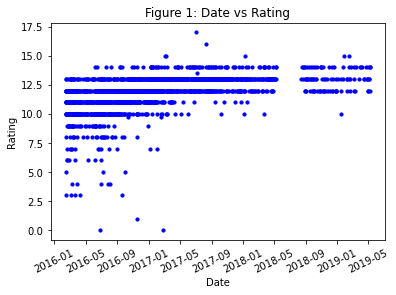

In [22]:
plt.xticks(rotation=25)
plt.scatter(data['created_at'], data['rating'], c = 'b', s = 10)
plt.title('Figure 1: Date vs Rating')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

# II. Linear Fitting

## Part 1: Datetime objects have a .timestamp() method that will give us a number (of seconds after some epoch), but we need to get that into our data before using it. 

In [23]:
def to_timestamp(dataFrame):
    return dataFrame.timestamp()
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [24]:
data

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09


## Part 2: A best-fit line.

In [25]:
from scipy import stats

In [26]:
fit = stats.linregress(data['timestamp'].values, data['rating'].values)
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [27]:
data['prediction'] =  data['timestamp'] * fit.slope + fit.intercept

In [28]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [29]:
fit.slope, fit.intercept

(3.515929974847721e-08, -40.46415480898916)

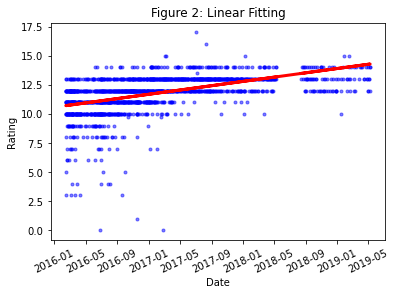

In [30]:
plt.xticks(rotation=25)
plt.plot(data['created_at'].values, data['rating'].values, 'b.', alpha=0.5)
plt.plot(data['created_at'].values, data['prediction'].values, 'r-', linewidth=3)
plt.title('Figure 2: Linear Fitting')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()